In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Carrega dados do FMI referentes ao Brasil

In [2]:
df = pd.read_csv("../data/brazil_gdp_inflation_ir.csv", dtype={'Time':np.int32, 'GDP':np.float64, 'Inflation':np.float64, 'Interest':np.float64}, index_col="Time")

#### Exibimos série histórica

In [3]:
df['RInterest'] = df.Interest - df.Inflation
brazil = df.sort()
brazil

,GDP,Inflation,Interest,RInterest
Time,,,,
1981,-4.233655,101.724821,NaN,NaN
1982,0.817012,100.543498,NaN,NaN
1983,-2.930728,135.027595,NaN,NaN
1984,6.358646,192.121770,NaN,NaN
1985,7.526882,225.991556,NaN,NaN
1986,7.000000,147.142166,NaN,NaN
1987,3.380561,228.335135,NaN,NaN
1988,-0.059936,629.114727,NaN,NaN
1989,4.024481,1430.723231,NaN,NaN


##Regressão entre taxa de inflação e taxa de crescimento do PIB

Como já evidenciado em outros estudos [[1](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.197.5261&rep=rep1&type=pdf)] [[2](https://www.imf.org/external/pubs/cat/longres.cfm?sk=1873.0)] [[3](http://courses.umass.edu/econ797a-rpollin/Bruno%201995%20paper.pdf)] e [[4](http://research.stlouisfed.org/publications/review/96/05/9605mb.pdf)] não existe correlação negativa entre inflação e crescimento para valores de inflação de até 10%, mesmo no Brasil.

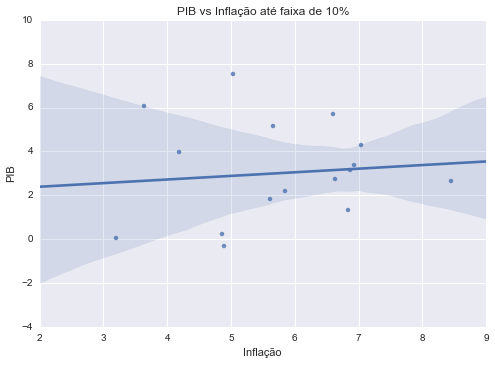

In [4]:
filter = brazil.Inflation < 11.0
sns.set(style="darkgrid")
plt.title("PIB vs Inflação até faixa de 10%")
ax = sns.regplot(brazil[filter].Inflation, brazil[filter].GDP, robust=True, n_boot=500)
ax.set_xlabel(u"Inflação")
ax.set_ylabel(u"PIB")

## Regressão entre taxa de juros e inflação

Um estudo recente [[4](http://www.scielo.br/scielo.php?pid=S0101-31572014000100001&script=sci_arttext)] aponta para a falta de evidências nas explicações frequentemente fornecidas para que as taxas de juros no Brasil precisem ser tão altas e por tão longo tempo e sugerem:
> *Hence a wise central bank should consider "testing" the market to make sure it is not dealing with an extreme equilibrium configuration or a long standing disequilibrium.*

Inpirado pelos 4 estudos citados até aqui resolvemos verificar a correlação entre taxas de juros e inflação nos patamares de até 10%.

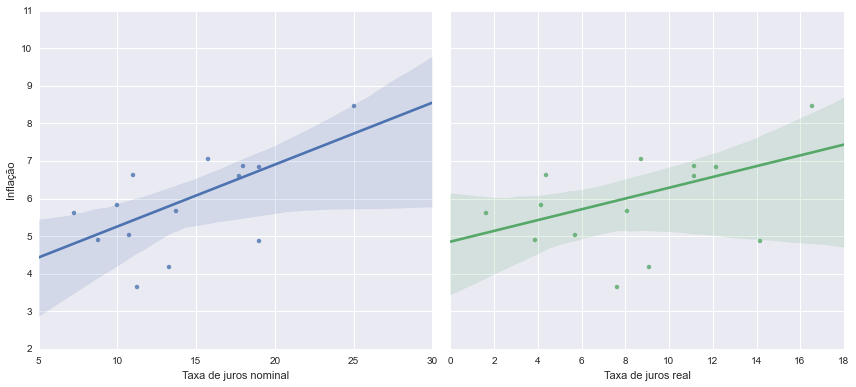

In [5]:
filter = brazil.Inflation < 11.0
color = sns.color_palette()[2]
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
f.set_figwidth(12)
sns.regplot(brazil[filter].Interest, brazil[filter].Inflation, robust=True, n_boot=500, ax=ax1)
sns.regplot(brazil[filter].RInterest, brazil[filter].Inflation, robust=True, n_boot=500, ax=ax2).set_ylabel("")
ax1.set_xlabel(u"Taxa de juros nominal")
ax2.set_xlabel(u"Taxa de juros real")
ax1.set_ylabel(u"Inflação")

f.tight_layout()

Note inflação correlaciona positivamente com taxa de juros, porém isso se explica pelo fato de se subir os juros
quando se entende que inflação está elevada. Alega-se em geral que variações nas taxas de juros levam ao
menos 6 meses para atuarem sobre o mercado, assim na próxima seção fazemos um shift de um ano sobre a taxa de juros.

## Regressão entre taxa de juros e inflação no ano seguinte.

Shift de um ano na taxa de juros.

In [6]:
brazil_ir_s1 = brazil.copy()
brazil_ir_s1.Interest = brazil.Interest.shift(1)
brazil_ir_s1.RInterest = brazil.RInterest.shift(1)

Sanity check

In [7]:
brazil_ir_s1[brazil_ir_s1.Inflation < 11]

,GDP,Inflation,Interest,RInterest
Time,,,,
1997,3.375298,6.925317,NaN,NaN
1998,0.035346,3.198592,NaN,NaN
1999,0.254079,4.857966,NaN,NaN
2000,4.306187,7.044702,19.00,14.142034
2001,1.310000,6.837831,15.75,8.705298
2002,2.660000,8.450221,19.00,12.162169
2004,5.710000,6.599125,16.50,1.784674
2005,3.160000,6.867350,17.75,11.150875
2006,3.960000,4.183681,18.00,11.132650


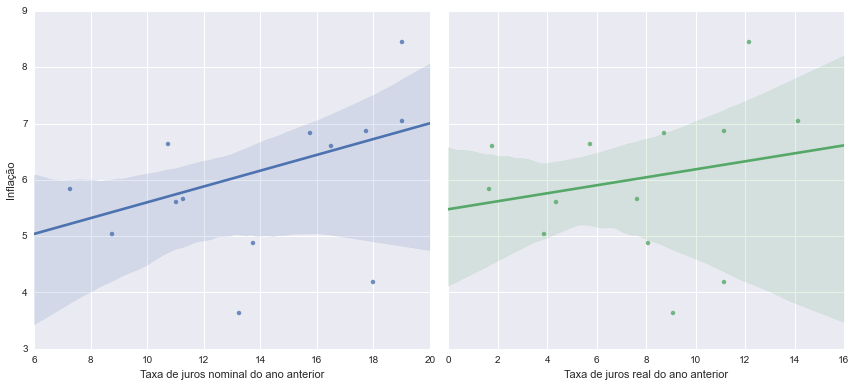

In [8]:
filter = brazil_ir_s1.Inflation < 11

color = sns.color_palette()[2]
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
f.set_figwidth(12)
sns.regplot(brazil_ir_s1[filter].Interest, brazil_ir_s1[filter].Inflation, robust=True, n_boot=500, ax=ax1)
sns.regplot(brazil_ir_s1[filter].RInterest, brazil_ir_s1[filter].Inflation, robust=True, n_boot=500, ax=ax2).set_ylabel("")
ax1.set_xlabel(u"Taxa de juros nominal do ano anterior")
ax2.set_xlabel(u"Taxa de juros real do ano anterior")
ax1.set_ylabel(u"Inflação")

f.tight_layout()

Note que a **não há evidência estatística** de que taxas de juros maiores provoquem reduçaõ da inflação no ano seguinte!

Talvez os efeitos da taxas de juros no Brasil sejam meio retardados... :-)
Vamos verificar para 2 anos de diferença

## Regressão entre taxa de juros e inflação dois anos à frente.

In [9]:
brazil_ir_s2 = brazil.copy()
brazil_ir_s2.Interest = brazil.Interest.shift(2)
brazil_ir_s2.RInterest = brazil.RInterest.shift(2)

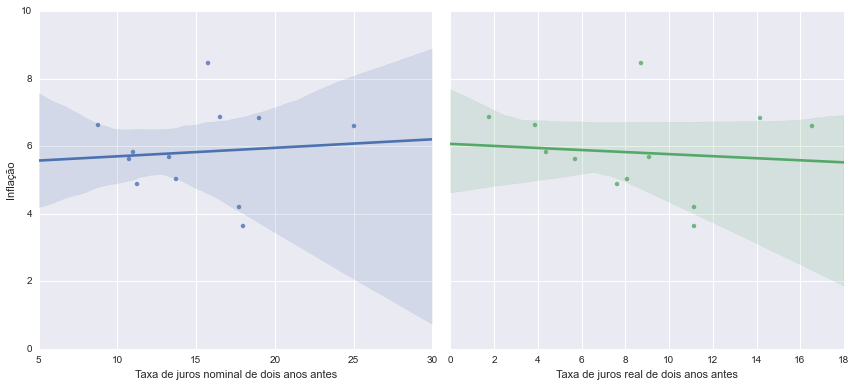

In [10]:
filter = brazil_ir_s2.Inflation < 11
sns.set(style="darkgrid")
color = sns.color_palette()[2]
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
f.set_figwidth(12)
sns.regplot(brazil_ir_s2[filter].Interest, brazil_ir_s2[filter].Inflation, robust=True, n_boot=500, ax=ax1)
sns.regplot(brazil_ir_s2[filter].RInterest, brazil_ir_s2[filter].Inflation, robust=True, n_boot=500, ax=ax2).set_ylabel("")
ax1.set_xlabel(u"Taxa de juros nominal de dois anos antes")
ax2.set_xlabel(u"Taxa de juros real de dois anos antes")
ax1.set_ylabel(u"Inflação")

f.tight_layout()

Note que a **não há evidência estatística** de que taxas de juros maiores provoquem redução da inflação dois anos após!

## Conclusão

*Work in progress*